<a href="https://colab.research.google.com/github/Fr3d1gg/Inteligencia-Artificial/blob/main/Semillero_IANLP_clase_2_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###**Curso: Inteligencia Artificial y Aprendizaje Automático**
####**Semillero IA**
#####**Prof Fausto Velasco**

###**Nombre del estudiante: Jose Alfredo Ramirez Aguirre**



**NOTAS:**

*   El siguiente documento supone que ejecutarás el archivo con Google-Colab.
*   Se trabajará solamente con el archivo "california_housing_train.csv".
*   Si no trabajas con Google-Colab, deberás descargar el archivo y trabajarlo en la aplicación de tu preferencia.
*   Esta actividad consta solamente de 3 ejercicios, dividios en 3 partes.
*   **Solamente deberás modificar este archivo agregando tus líneas de código en las 3 partes que se te indican.**
*   **Cualquier modificación fuera de estas áreas te restará puntos a la actividad.**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [4]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:
DIR = "/content/sample_data/"
os.chdir(DIR)

misdatos = pd.read_csv("california_housing_train.csv", sep=",")
misdatos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#**Ejercicio - 1: Matriz de Correlación de Pearson**

INSTRUCCIONES:

En este ejercicio debes solamente desplegar la matriz de correlación de las variables del dataframe "misdatos", incluyendo en cada celda de la matriz el valor numérico de la correlación entre cada par variables.

Al desplegar la matriz de correlación deberás además usar la opción del mapa de calor (heatmap) de la librería seaborn, usando el mapa de color 'BuGn'.

Puedes consultar la siguiente documentación:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html


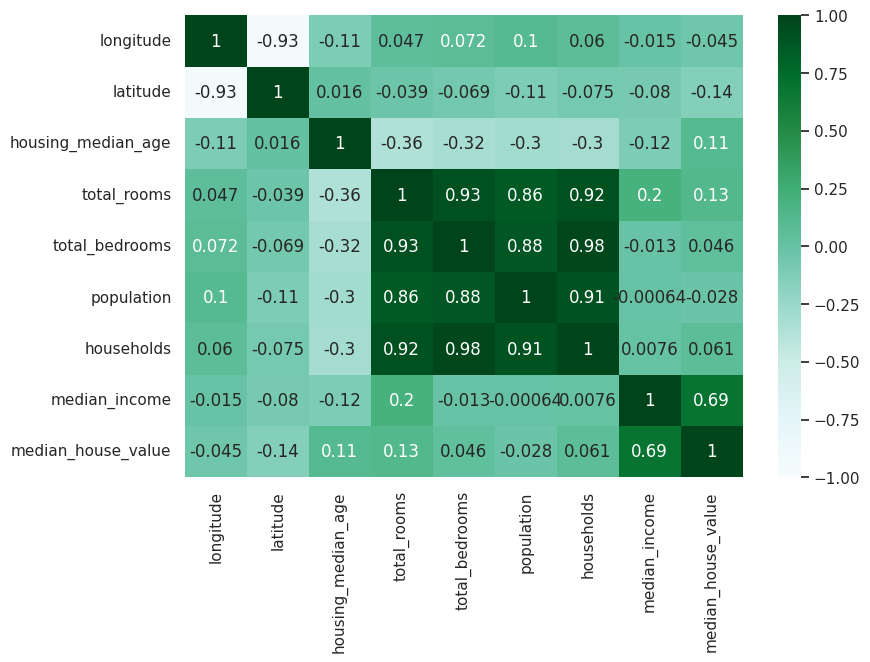

In [5]:

sns.set(rc={'figure.figsize':(9,6)})

#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 1
# Sustituye "None" por tus líneas de código dentro de esta región.
# Se esperan cuando mucho 2 líneas de código.

None
corr_matrix = misdatos.corr(method='pearson')
hm = sns.heatmap(corr_matrix, annot=True, cmap='BuGn',vmin=-1,vmax=1)

#


# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

plt.show()

**Explicacion de la tabla**
La tabla nos muestra un mapa de calor de la matriz de correlacion pearson,todos los datos fueron jalados de un dataset.
Ademas que tiene que ver con el contexto geografico de california,con ello se pueden interpretar si es que hay una relacion lineal entre las variables.
Encontramos variables que son esenciales para entender como se mueven todas las caracteristicas,asi como la correlacion positiva entre las variables
*median_income* y *median_house_value* esto es crucial para determinar ciertos criterios de vivienda o ingresos.

#**Ejercicio - 2: Transformaciones e Hisotgramas de variables**

INSTRUCCIONES:

En este ejercicio se trabajará solamente con las siguientes 7 variables:

*   housing_median_age
*   total_rooms
*   total_bedrooms
*   population
*   households
*   median_income
*   median_house_value

A cada una de dichas columnas les deberás aplicar las siguientes transformaciones y desplegar sus histogramas con 20 barras (bins):

*   Raíz cuadrada con Numpy.
*   Logaritmo natural con Numpy.
*   Potencia 2 (i.e., elevar al cuadrado) con Numpy.
*   Box-Cox con scikit-learn.


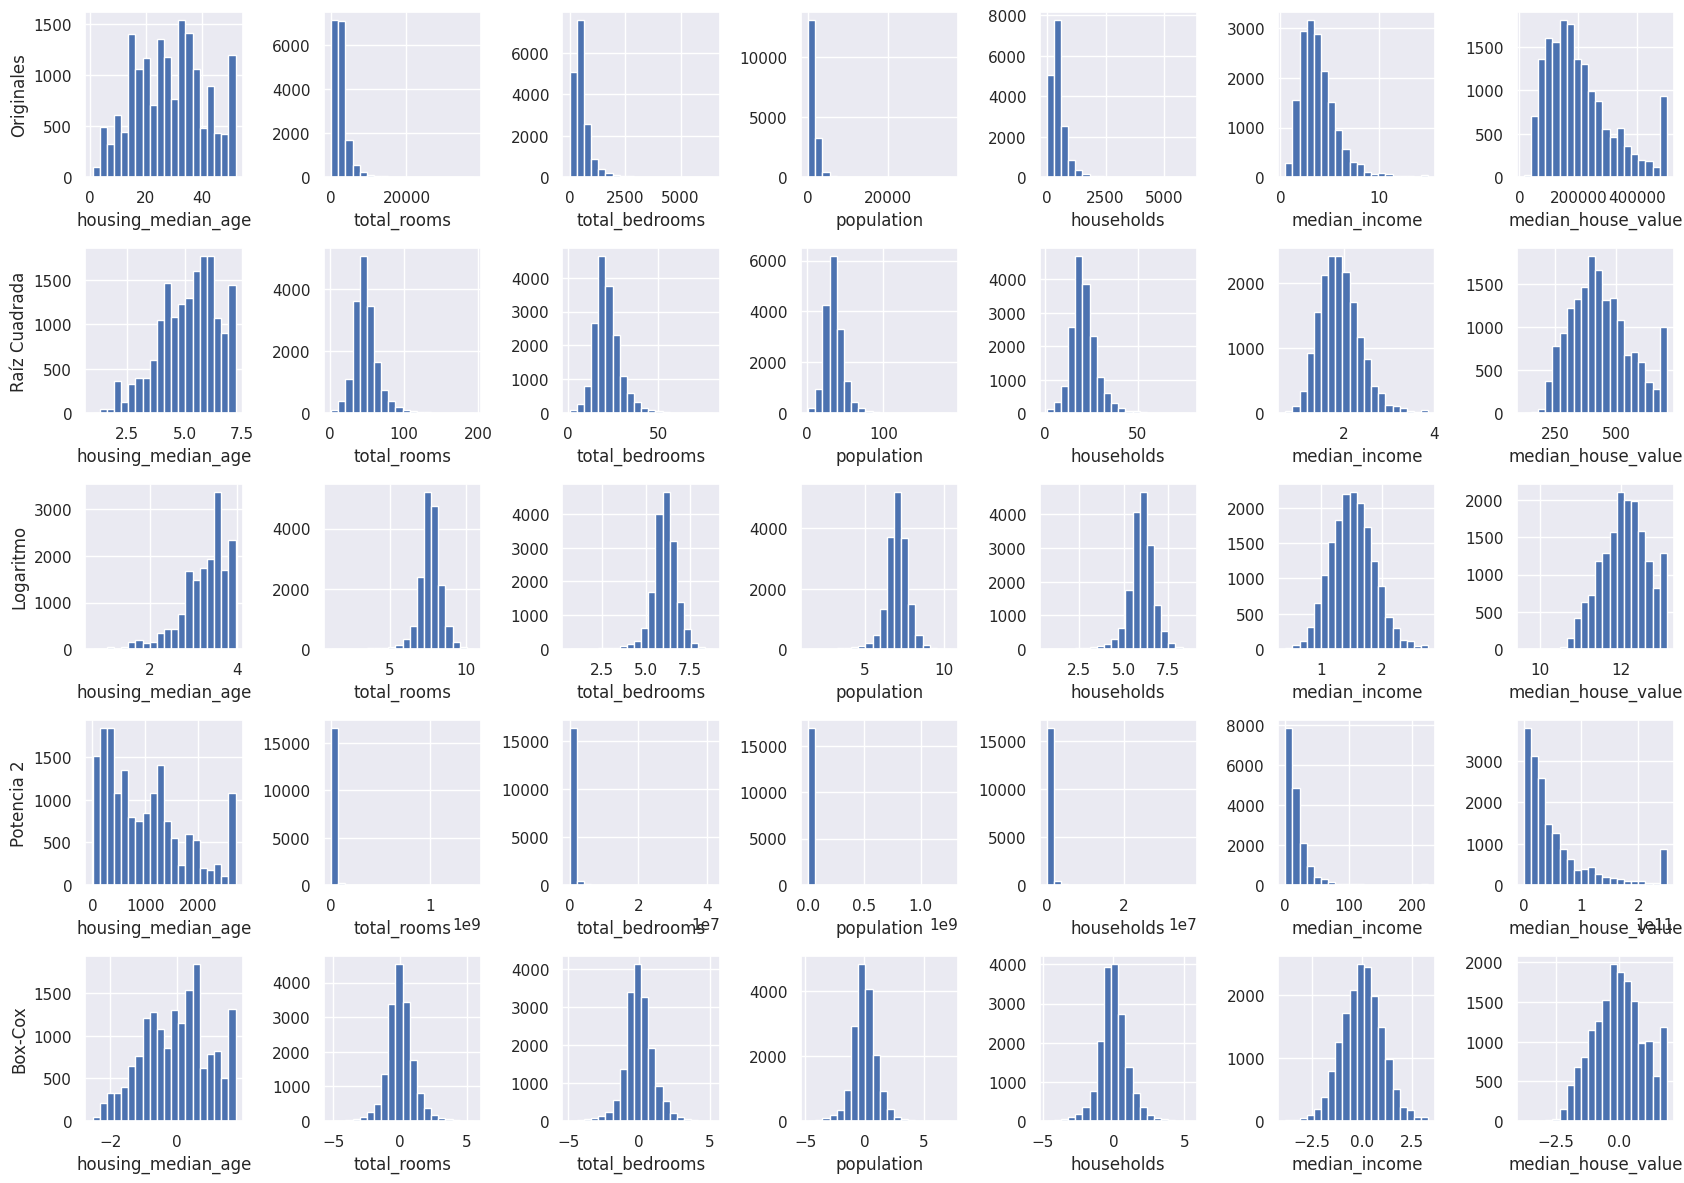

In [6]:


variables_a_transformar = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']

sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 7)

for k in range(0,7):

    # Datos originales
    plt.subplot(5,7,k+1)
    Transf0 = misdatos[variables_a_transformar[k]].dropna()  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(Transf0, bins=20)                                 #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).
    plt.xlabel(variables_a_transformar[k])                      #Me permite poner una etiqueta a mi histograma
    if k==0:
        plt.ylabel('Originales')

    # Raíz cuadrada
    plt.subplot(5,7,k+8)
    Transf1 = np.sqrt(Transf0)
    plt.hist(Transf1, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Raíz Cuadrada')

    # Logaritmo natural
    plt.subplot(5,7,k+15)
    Transf2 = np.log1p(Transf0)  # log1p evita problemas con ceros (log(1 + x))
    plt.hist(Transf2, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Logaritmo')

    # Potencia de 2
    plt.subplot(5,7,k+22)
    Transf3 = np.power(Transf0, 2)
    plt.hist(Transf3, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Potencia 2')

    # Box-Cox (requiere valores positivos)
    plt.subplot(5,7,k+29)
    # Box-Cox requiere reshaping a 2D
    Transf4 = power_transform(Transf0.values.reshape(-1,1), method='box-cox')
    plt.hist(Transf4, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Box-Cox')

plt.tight_layout()
plt.show()

**Analisis de las transformaciones**
En base a lo que observo de las transformaciones me quedo con la Box-Cox y con la de logaritmo natural.
¿Porque box-cox?
Porque es una transformacion que es adaptable y produce la distribución más cercana a la normal,ademas no necesito quebrarme tanto la cabez para saber que transformacion utilizar ya que esta lo hace por mi.
¿Porque logaritmo natural?
Es una transformación efectiva y simple para reducir la desviacion en variables muy asimétricas,ademas es mas facil de aplicar.


#**Ejercicio - 3 - Métricas de desempeño: $RMSE$, $MAE$ y $MAPE$**



INSTRUCCIONES:

En el archivo Teoriaclase2.pdf compartido se muestran las fórmulas que definen a las métricas $RMSE$, $MAE$ y $MAPE$.

Investiga el significado de cada una de ellas.

Cada una de ellas se puede calcular mediante los valores observados reales $y$, los valores de predicción $\hat{y}$ y el total de registros $n$.

En este ejercicio deberás definir cada una de estas métricas mediante tres funciones que llamarás mi_RMSE, mi_MAE y mi_MAPE.

Cada una de las tres funciones que definas deberán tener dos argumentos, a saber, los valores observados reales $y$ y los valores de predicción $\hat{y}$.

Como valor de retorno deberá ser el valor numérico real dado por la fórmula que lo define.

Solamente podrás usar las funciones de NumPy del promedio (mean), cuadrado (square) y valor absoluto (abs), además de las operaciones aritméticas básicas.

Para la definición de cada una de ellas se esperarían cuando mucho 5 líneas de código en total, pero pueden ser menos. Una cantidad mayor a esta será penalizada.


In [19]:
# Incluye aquí las líneas de código que definan a la función: mi_RMSE:
def mi_RMSE(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

# Incluye aquí las líneas de código que definan a la función: mi_MAE:
def mi_MAE(y, y_hat):
    return np.mean(np.abs(y - y_hat))

# Incluye aquí las líneas de código que definan a la función: mi_MAPE:
def mi_MAPE(y, y_hat):
    return np.mean(np.abs((y - y_hat) / y)) * 100

In [18]:
Xtrain = misdatos.drop('median_house_value', axis='columns')
ytrain = misdatos['median_house_value']

num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),
                                        ('scalar', MinMaxScaler(feature_range=(1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ])

numerical_features = ['total_rooms','total_bedrooms','population','households','median_income']

columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, numerical_features)],
                                        remainder='passthrough')

modelo_LR = LinearRegression()

scores_RMSEVal = []
scores_MAEVal = []
scores_MAPEVal = []

kf = KFold(n_splits= 10, shuffle=True)

for train_index, val_index in kf.split(Xtrain):

  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  XtrainFit = columnasTransformer.fit(X_train)
  XtrainTransf = XtrainFit.transform(X_train)

  modelo_LR = modelo_LR.fit(XtrainTransf, y_train)

  XvalTransf = XtrainFit.transform(X_val)
  yhatVal = modelo_LR.predict(XvalTransf)

  scores_RMSEVal.append(mi_RMSE(y_val, yhatVal))
  scores_MAEVal.append(mi_MAE(y_val, yhatVal))
  scores_MAPEVal.append(mi_MAPE(y_val, yhatVal))


# Desplegar información:
results = [scores_RMSEVal, scores_MAEVal, scores_MAPEVal]
names = ['RMSEval','MAEval','MAPEval']

print("\t  %s\t\t%s   \t\t%s" % (names[0],names[1],names[2]))
for i,z in enumerate(zip(scores_RMSEVal, scores_MAEVal, scores_MAPEVal)):
  print("fold[%d]:  %.1f \t\t%.1f  \t\t%.1f%%" % (i+1,z[0],z[1],z[2]))
print("mean(std) %.1f(%.1f)  \t%.1f(%.1f)   \t%.1f%% (%.1f)" % (np.mean(scores_RMSEVal), np.std(scores_RMSEVal),
                                                                np.mean(scores_MAEVal), np.std(scores_MAEVal),
                                                                np.mean(scores_MAPEVal), np.std(scores_MAPEVal)))

	  RMSEval		MAEval   		MAPEval
fold[1]:  69194.1 		49803.9  		29.2%
fold[2]:  69870.5 		51107.7  		31.3%
fold[3]:  69018.1 		50557.3  		29.9%
fold[4]:  67135.8 		49914.3  		29.5%
fold[5]:  73462.0 		52801.6  		30.6%
fold[6]:  67602.3 		49436.5  		30.0%
fold[7]:  68892.5 		51531.7  		29.9%
fold[8]:  71223.6 		51877.9  		30.4%
fold[9]:  67714.3 		50612.8  		30.3%
fold[10]:  66159.8 		49176.3  		30.9%
mean(std) 69027.3(2019.9)  	50682.0(1096.6)   	30.2% (0.6)


**\<\<Fin de la Actividad_1_Semana_2>>**

**Explicacion**
El modelo  por lo visto utiliza  una validación cruzada para medir su desempeño al predecir el valor medio de las casas. Las métricas utilizadas —RMSE, MAE y MAPE— permiten analizar el error en diferentes formas: el RMSE resalta los errores grandes, el MAE muestra el error promedio sin importar su dirección, y el MAPE expresa el error en términos porcentuales respecto al valor real